# Introducción a la manipulación de datos con pandas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png" width="400px" height="400px" />

> Una de las mejores cosas de Python (especialmente si eres un analista de datos) es la gran cantidad de librerías de alto nivel que se encuentran disponibles.

> Algunas de estas librerías se encuentran en la librería estándar, es decir, se pueden encontrar donde sea que esté Python. Otras librerías se pueden añadir fácilmente.

> Hoy nos dedicaremos a estudiar la librería de Python para análisis de datos: **Pandas**. Como analistas de datos, esta librería será pan de cada día y les aseguro que cada día que la utilicen aprenderán cosas nuevas... entonces, más vale comenzar pronto.

Referencias:
- https://pandas.pydata.org/
- https://towardsdatascience.com/data-science-with-python-intro-to-loading-and-subsetting-data-with-pandas-9f26895ddd7f
___

# 0. Motivación

Como analistas de datos, normalmente trabajamos con grandes cantidades de datos. 

Los datos que debemos cargar pueden guardarse de muchas maneras distintas: archivos CSV, archivos de Excel, etcétera. Incluso, los datos pueden estar disponibles a través de servicios web. 

Para trabajar con datos, se hace necesario representarlos en una estructura tabular (cualquier cosa con forma de tabla con filas y columnas).

En algunos casos, los datos ya están en forma tabular y es más fácil cargarlos. En otros, debemos trabajar con datos no estructurados o que no están organizados de una manera determinada (texto plano, imágenes, audio, etcétera).

En esta clase nos vamos a concentrar en cargar datos desde archivos CSV (valores separados por coma).

## Pandas

Pandas es una librería de código abierto para el lenguaje de programación Python, desarrollada por Wes McKinney. Es una librería muy eficiente y proporciona estructuras de datos y herramientas de análisis muy fáciles de usar.

Como las librerías que hemos visto antes, Pandas viene instalado por defecto con Anaconda, así que lo único que tenemos que hacer para empezar a trabajar con ella es importarla. La comunidad utiliza normalmente la abreviación pd para referirse a pandas:

In [1]:
# Importar pandas
import pandas as pd

Los **pd.DataFrames** son los objetos por excelencia de pandas para manipular datos. Son eficientes y rápidos. Son la estructura de datos donde pandas carga los diferentes formatos de datos: cuando nuestros datos están limpios y estructurados, cada fila representa una observación, y cada columna una variable o característica. Tanto las filas como las columnas pueden tener etiquetas.

En esta clase vamos a trabajar con datos de características y precios de casas de la ciudad de Portland, OR (datos tomados del curso [Machine Learning](https://www.coursera.org/learn/machine-learning) de Andrew Ng). Los datos se encuentran en el archivo `house_pricing_short.csv`.

En esta y la siguiente clase, además de importar datos, aprenderemos a:
- seleccionar subconjuntos de datos;
- filtrar variables por categorías;
- relacionar tablas con datos complementarios;
- entre otros.

Comenzamos:

___
# 1. Importando datos

El archivo `house_pricing_short.csv` contiene información acerca de el número de cuartos, el tamaño y los precios de casas de la ciudad de Portland, OR.

El primer paso para comenzar a trabajar con datos es importarlos. Lo podemos hacer con la función `pd.read_csv()`:

In [2]:
# Ayuda en la función pd.read_csv()
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

Importemos los datos:

In [3]:
# Importar house_pricing.csv
data = pd.read_csv("house_pricing_short.csv")

In [4]:
# Observar los datos
data

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [5]:
# Tipo de lo que importamos
type(data)

pandas.core.frame.DataFrame

Hagamos que el índice represente el identificador de cada casa:

In [6]:
data.index = range(1, 11)
data.index.name = "house_id"

In [7]:
data

,size,n_bedrooms,price
house_id,,,
1,2104,3,399900
2,1600,3,329900
3,2400,3,369000
4,1416,2,232000
5,3000,4,539900
6,1985,4,299900
7,1534,3,314900
8,1427,3,198999
9,1380,3,212000


___
# 2. Indización y selección de datos

Hay muchas formas de las cuales podemos seleccionar datos de DataFrames. Veremos, de acuerdo al artículo al final de este documento, la forma basada en corchetes ([]) y en los métodos `loc()` y `iloc()`.

Con los corchetes, podemos seleccionar ciertas filas, o bien, ciertas columnas. 

Para una selección de filas, podemos usar el indizado como en las listas: [start_index:end_index:step], recordando que el `end_index` no es inclusivo.

Por ejemplo, seleccionar las casas en las primeras dos filas:

In [9]:
# data[0:2:1]
# data[0:2]
data[:2]

,size,n_bedrooms,price
house_id,,,
1,2104,3,399900
2,1600,3,329900


Ahora, seleccionar de la casa 7 en adelante:

In [10]:
data[6:]

,size,n_bedrooms,price
house_id,,,
7,1534,3,314900
8,1427,3,198999
9,1380,3,212000
10,1494,3,242500


Finalmente, seleccionar las casas en las filas impares:

In [11]:
data[::2]

,size,n_bedrooms,price
house_id,,,
1,2104,3,399900
3,2400,3,369000
5,3000,4,539900
7,1534,3,314900
9,1380,3,212000


Similarmente, para una selección de columnas, podemos usar una lista con los nombres de las columnas requeridas. 

In [12]:
# Seleccionar la columna n_bedrooms
data[['n_bedrooms']]

,n_bedrooms
house_id,
1,3
2,3
3,3
4,2
5,4
6,4
7,3
8,3
9,3


Finalmente, seleccionamos dos columnas:

In [13]:
# Seleccionar las columnas n_bedrooms y size
data[['n_bedrooms', 'size']]

,n_bedrooms,size
house_id,,
1,3,2104
2,3,1600
3,3,2400
4,2,1416
5,4,3000
6,4,1985
7,3,1534
8,3,1427
9,3,1380


Muy bien, ya vimos que los corchetes son útiles. También existen los poderosos métodos `loc` y `iloc`, que nos dan el poder de seleccionar ambos a la vez: columnas y filas.

¿En qué se diferencian?

- El método `loc` nos permite seleccionar filas y columnas de nuestros datos basados en etoquetas. Primero, se deben especificar las etiquetas de las filas, y luego las de las columnas.

- El método `lioc` nos permite hacer lo mismo pero basado en índices enteros de nuestro DataFrame (como si fueran matrices).

Como antes, si queremos seleccionar todas las filas, o columnas, simplemente escribimos `:` en el lugar adecuado.

Mejor con ejemplos:

Para un mejor entendimiento de esta parte, reetiquetaremos la numeración de clientes con una "numeración" alfabética. Es decir: 1-A, 2-B, ..., 10-J.

In [14]:
# Resetear índice en el lugar
data.reset_index(drop=True, inplace=True)

In [15]:
data

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [16]:
# Reasignar índice alfabético
data.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
data.index.name = 'house_id'

In [17]:
data

,size,n_bedrooms,price
house_id,,,
A,2104,3,399900
B,1600,3,329900
C,2400,3,369000
D,1416,2,232000
E,3000,4,539900
F,1985,4,299900
G,1534,3,314900
H,1427,3,198999
I,1380,3,212000


Ahora sí.

Seleccionemos la primer casa con ambos métodos:

In [18]:
# Primer casa con loc
data.loc[['A']]

,size,n_bedrooms,price
house_id,,,
A,2104,3,399900


In [19]:
# Primer casa con iloc
data.iloc[[0]]

,size,n_bedrooms,price
house_id,,,
A,2104,3,399900


Ahora, seleccionemos las casas A y C con ambos métodos:

In [20]:
# Casas A y C con loc
data.loc[['A', 'C']]

,size,n_bedrooms,price
house_id,,,
A,2104,3,399900
C,2400,3,369000


In [21]:
# Casas A y C con iloc
data.iloc[[0, 2]]

,size,n_bedrooms,price
house_id,,,
A,2104,3,399900
C,2400,3,369000


Ahora, de las casas B y E, queremos sus tamaños y sus números de recámaras:

In [22]:
# loc
data.loc[['B', 'E'], ['size', 'n_bedrooms']]

,size,n_bedrooms
house_id,,
B,1600,3
E,3000,4


In [23]:
# iloc
data.iloc[[1, 4], [0, 1]]

,size,n_bedrooms
house_id,,
B,1600,3
E,3000,4


Ahora, queremos solo los tamaños y los precios, pero de todas las casas:

In [24]:
# loc
data.loc[:, ['size', 'n_bedrooms']]

,size,n_bedrooms
house_id,,
A,2104,3
B,1600,3
C,2400,3
D,1416,2
E,3000,4
F,1985,4
G,1534,3
H,1427,3
I,1380,3


In [25]:
# iloc
data.iloc[:, [0, 1]]

,size,n_bedrooms
house_id,,
A,2104,3
B,1600,3
C,2400,3
D,1416,2
E,3000,4
F,1985,4
G,1534,3
H,1427,3
I,1380,3


¿Qué tal? Ya tenemos varias formas de seleccionar e indexar ciertos datos.

Esto es, sin duda, muy útil. Por otra parte, muchas veces queremos obtener cierta información (clientes, en nuestro ejemplo) que cumplan algunos requisitos. Por ejemplo:
- que sean mayores de 18 años, o
- que su antiguedad en la plataforma sea menor a seis meses, o
- que residan en cierta zona,
- entre otros.

Para ello utilizamos los operadores de comparación (==, >, <, >=, <=, !=).

___
# 3. Filtrado de datos

Los operadores de comparación pueden ser utilizados con pandas. 

Esto resulta ser súper útil para filtrar datos con ciertas condiciones específicas (esto lo veremos enseguida). 

In [27]:
data

,size,n_bedrooms,price
house_id,,,
A,2104,3,399900
B,1600,3,329900
C,2400,3,369000
D,1416,2,232000
E,3000,4,539900
F,1985,4,299900
G,1534,3,314900
H,1427,3,198999
I,1380,3,212000


**Ejemplos**

¿Cuáles casas tienen más de 3 recámaras?

In [26]:
data[data['n_bedrooms'] > 3]

,size,n_bedrooms,price
house_id,,,
E,3000,4,539900
F,1985,4,299900


¿Cuáles casas valen menos de $\$300,000$?

In [28]:
data[data['price'] < 300000]

,size,n_bedrooms,price
house_id,,,
D,1416,2,232000
F,1985,4,299900
H,1427,3,198999
I,1380,3,212000
J,1494,3,242500


___
# 4. Propiedades estadísticas de las variables

En este caso tenemos nada más 10 registros:

In [29]:
data

,size,n_bedrooms,price
house_id,,,
A,2104,3,399900
B,1600,3,329900
C,2400,3,369000
D,1416,2,232000
E,3000,4,539900
F,1985,4,299900
G,1534,3,314900
H,1427,3,198999
I,1380,3,212000


y es fácil explorar las variables simplemente viéndolas una por una, registro por registro:

In [30]:
len(data)

10

Sin embargo, será común tener cantidades de registros en los órdenes de cientos de miles, millones y muchísimos más. En estos casos, deja de ser viable llevar a cabo un entendimiento de estas variables por medio de inspección visual directa. 

Es mucho más conveniente resumir las variables por medio de medidas estadísticas como la media, mediana, desviación estándar y cuartiles:

In [31]:
# Media
data.mean()

size            1834.0
n_bedrooms         3.1
price         313899.9
dtype: float64

In [32]:
# Mediana
data.median()

size            1567.0
n_bedrooms         3.0
price         307400.0
dtype: float64

In [33]:
# Desviación estándar
data.std()

size             535.667600
n_bedrooms         0.567646
price         104004.503001
dtype: float64

In [34]:
# Resumen general
data.describe()

,size,n_bedrooms,price
count,10.0000,10.000000,10.000000
mean,1834.0000,3.100000,313899.900000
std,535.6676,0.567646,104004.503001
min,1380.0000,2.000000,198999.000000
25%,1443.7500,3.000000,234625.000000
50%,1567.0000,3.000000,307400.000000
75%,2074.2500,3.000000,359225.000000
max,3000.0000,4.000000,539900.000000


Incluso, `pandas` nos facilita la visualización de estas propiedades mediante histogramas:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21dfa936d0>,
      dtype=object)

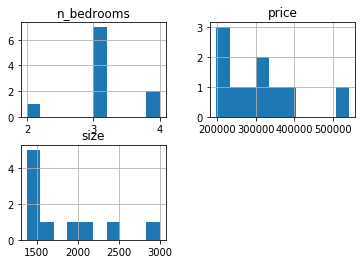

In [35]:
data.hist()

# Hasta acá la sesión de hoy, la siguiente clase seguimos.

## [Tutorial de pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)

## [Artículo recomendado](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)